In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
plt.style.use(['science', 'no-latex'])

#### Normalización Estándar 

Hacemos una transformación en mis datos

$$ x_{norm} = \frac{x -\mu}{\sigma} $$

Siempre y cuando se estudie cual es el efecto que tiene la normalización en mis datos

In [3]:
data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = data[0]
y = data[1]

x_normal = (x-np.mean(x))/np.std(x)



In [5]:
def gradiente_descendent(x, y, iterations, learning_rate, tolerance, degree = 1):
     
    datax = [x**(i) for i in range(degree+1)]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.random.uniform(-10.0, 10.0, size=degree+1)
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        #Actualizamos w
        
        
        
        current_w = current_w - learning_rate*gradient
    

    return current_w



In [41]:
def gradiente_descendent(x, y, iterations, w0, learning_rate, tolerance, degree = 1):
     
    datax = [x**(i) for i in range(degree+1)]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.array(w0)
    cost_array = np.array([])
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if (i%1000 == 1000):
            print(f'Iteration {i}  w:{current_w}')
        
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        
        #Actualizamos w
        current_w = current_w - learning_rate*gradient
        
        cost_array  = np.append(np.sum((X @ current_w - y)**2), cost_array)
    

    return cost_array, current_w



In [43]:
cost, w_n1 = gradiente_descendent(x_normal, y, 10000, [11, 0], 1e-2, 1e-4, 1)

x_aux = np.linspace(np.min(x_normal), np.max(x_normal), 250)


Convergio en 410 iteraciones. 


array([ 1.3624927 ,  1.36257799,  1.36266502,  1.36275381,  1.3628444 ,
        1.36293683,  1.36303114,  1.36312737,  1.36322554,  1.36332571,
        1.36342792,  1.3635322 ,  1.3636386 ,  1.36374716,  1.36385792,
        1.36397093,  1.36408623,  1.36420388,  1.36432392,  1.36444639,
        1.36457135,  1.36469885,  1.36482893,  1.36496166,  1.36509708,
        1.36523525,  1.36537623,  1.36552006,  1.36566682,  1.36581656,
        1.36596934,  1.36612522,  1.36628427,  1.36644655,  1.36661212,
        1.36678105,  1.36695341,  1.36712927,  1.36730871,  1.36749178,
        1.36767858,  1.36786916,  1.36806362,  1.36826202,  1.36846445,
        1.368671  ,  1.36888173,  1.36909675,  1.36931613,  1.36953996,
        1.36976834,  1.37000136,  1.37023911,  1.37048168,  1.37072918,
        1.37098171,  1.37123936,  1.37150224,  1.37177047,  1.37204413,
        1.37232336,  1.37260825,  1.37289893,  1.37319551,  1.37349811,
        1.37380686,  1.37412187,  1.37444328,  1.37477122,  1.37

In [8]:
def poly(x, weights):
    
    y_p = 0
    for i in range(len(weights)):
        y_p += weights[i]*x**(i)
        
    return y_p 

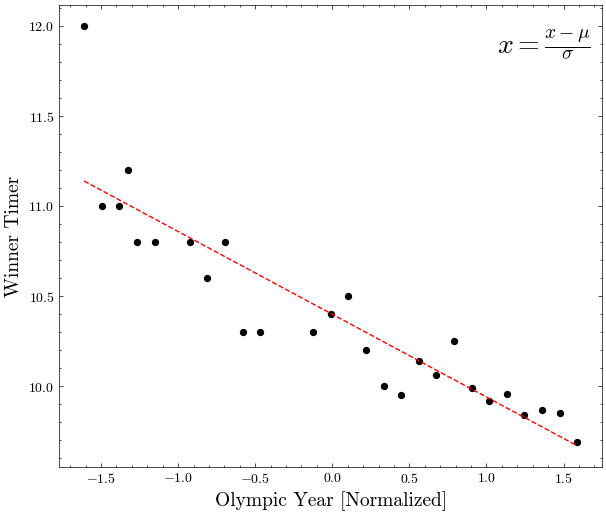

In [59]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x_normal, y, color = 'black', s=18)
plt.plot(x_aux, poly(x_aux, w_n1), 'r--')
plt.xlabel('Olympic Year [Normalized]', fontsize = 14)
plt.ylabel('Winner Timer', fontsize = 14)
fig.text(.75, 0.8, r'$x = \frac{x - \mu}{\sigma}$ ', fontsize = 20);

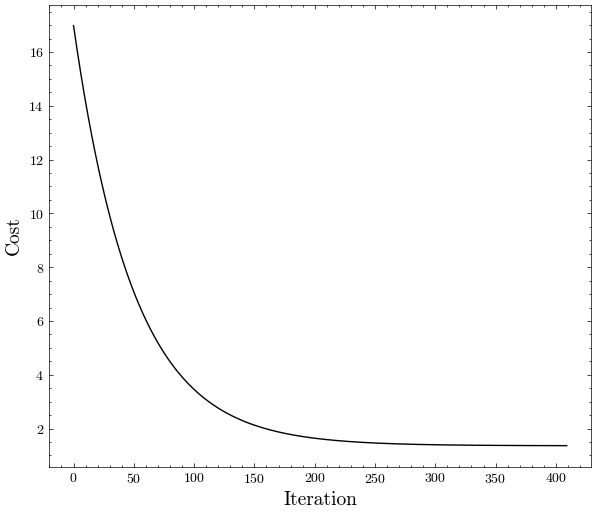

In [49]:
fig = plt.figure(figsize=(7, 6))
plt.plot(cost[::-1], color = 'black')
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Cost', fontsize = 14);